In [12]:
import os
os.getcwd()

'/Users/zachlabkovski/Documents/ISYE_6740'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

/var/folders/y0/_5f48qsj4v9d60c51lxl74600000gn/T/ipykernel_15827/2458010851.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [5]:
#Remove data points missing latitude/longitude data
data = data.dropna(subset = ['LATITUDE', 'LONGITUDE'])
#Make sure we don't have any fully useless columns
data = data.dropna(axis = 1, how = 'all')

In [6]:
#Convert date and time to date/time
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'], format = '%m/%d/%Y')
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format = '%H:%M')
data['CRASH TIME'] = [time.time() for time in data['CRASH TIME']]

In [10]:
#ZIP Code is categorical -> convert to string
import numpy as np
data = data.replace(r'^\s*$', np.nan, regex=True)
mask = pd.to_numeric(data['ZIP CODE']).notnull()
data['ZIP CODE'].loc[mask] = data['ZIP CODE'].loc[mask].astype(np.int64)
data['ZIP CODE'] = data['ZIP CODE'].astype(str)

/var/folders/y0/_5f48qsj4v9d60c51lxl74600000gn/T/ipykernel_15827/274026561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ZIP CODE'].loc[mask] = data['ZIP CODE'].loc[mask].astype(np.int64)


In [11]:
data

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,2021-09-11,09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
6,2021-12-14,17:05:00,NaN,nan,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,2021-12-14,08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,2021-12-14,21:10:00,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943148,2022-11-05,13:10:00,MANHATTAN,10018,40.749283,-73.983960,"(40.749283, -73.98396)",NaN,NaN,376 5 AVENUE,...,Unspecified,NaN,NaN,NaN,4579899,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN
1943149,2022-10-30,13:56:00,STATEN ISLAND,10305,40.615597,-74.063170,"(40.615597, -74.06317)",HYLAN BOULEVARD,EDGEWATER STREET,NaN,...,NaN,NaN,NaN,NaN,4579711,Sedan,Sedan,NaN,NaN,NaN
1943150,2022-10-27,23:00:00,STATEN ISLAND,10310,40.636513,-74.112620,"(40.636513, -74.11262)",NaN,NaN,230 BEMENT AVENUE,...,Unspecified,NaN,NaN,NaN,4579726,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1943151,2022-10-28,11:30:00,MANHATTAN,10031,40.829430,-73.941960,"(40.82943, -73.94196)",SAINT NICHOLAS AVENUE,WEST 153 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4579746,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN


In [29]:
histdata = data[['CRASH DATE', 'CRASH TIME']].copy()

In [140]:
histdata
min(histdata['CRASH DATE'])

Timestamp('2012-07-01 00:00:00')

In [31]:
histdata['CRASH MONTH'] = pd.DatetimeIndex(histdata['CRASH DATE']).month
histdata['CRASH DAY OF MONTH'] = pd.DatetimeIndex(histdata['CRASH DATE']).day
histdata['CRASH DAY OF WEEK'] = pd.DatetimeIndex(histdata['CRASH DATE']).dayofweek

In [65]:
histdata['CRASH MINUTE OF DAY'] = [60*(t.hour) + t.minute for t in histdata['CRASH TIME']]

In [139]:
corr = histdata.groupby(['CRASH DAY OF MONTH', 'CRASH DAY OF WEEK']).count().unstack(level=0)
corr.T

CRASH DAY OF WEEK                          0     1     2     3     4     5  \
                    CRASH DAY OF MONTH                                       
CRASH DATE          1                   7955  7944  7995  7797  9319  8152   
                    2                   8346  8317  8109  8493  8246  7797   
                    3                   8740  8922  8490  8446  8688  6908   
                    4                   8402  8531  8000  8057  8583  7324   
                    5                   7669  8425  8599  8965  9225  7402   
...                                      ...   ...   ...   ...   ...   ...   
CRASH MINUTE OF DAY 27                  7717  7197  8402  8827  8584  7500   
                    28                  7158  8174  7489  8566  9168  7658   
                    29                  7457  7473  7763  7302  7844  7347   
                    30                  7607  7296  7455  8220  7825  6998   
                    31                  4241  5114  4818  5116  5955  3761   

CRASH DAY OF WEEK                          6  
                    CRASH DAY OF MONTH        
CRASH DATE          1                   6964  
                    2                   6979  
                    3                   6903  
                    4                   6005  
                    5                   6479  
...                                      ...  
CRASH MINUTE OF DAY 27                  6124  
                    28                  6529  
                    29                  6492  
                    30                  6139  
                    31                  4094  

[155 rows x 7 columns]

In [66]:
histdata

,CRASH DATE,CRASH TIME,CRASH MONTH,CRASH DAY OF MONTH,CRASH DAY OF WEEK,CRASH DAY OF YEAR,CRASH MINUTE OF DAY
3,2021-09-11,09:35:00,9,11,5,254,575
4,2021-12-14,08:13:00,12,14,1,348,493
6,2021-12-14,17:05:00,12,14,1,348,1025
7,2021-12-14,08:17:00,12,14,1,348,497
8,2021-12-14,21:10:00,12,14,1,348,1270
...,...,...,...,...,...,...,...
1943148,2022-11-05,13:10:00,11,5,5,309,790
1943149,2022-10-30,13:56:00,10,30,6,303,836
1943150,2022-10-27,23:00:00,10,27,3,300,1380
1943151,2022-10-28,11:30:00,10,28,4,301,690


In [51]:
histdata['CRASH DAY OF YEAR'] = histdata['CRASH DATE'].dt.dayofyear

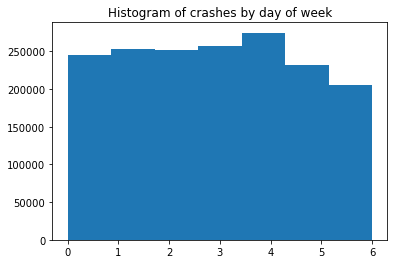

In [39]:
import matplotlib.pyplot as plt
weekhist = plt.figure()
plt.hist(histdata['CRASH DAY OF WEEK'], bins = 7)
plt.title('Histogram of crashes by day of week')
weekhist.savefig('weekhist.png')

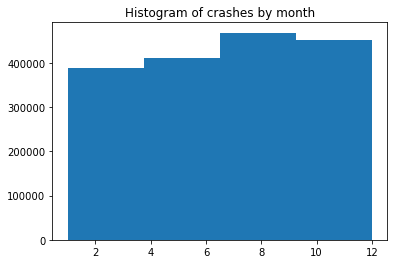

In [59]:
monthhist = plt.figure()
plt.hist(histdata['CRASH MONTH'], bins = 4)
plt.title('Histogram of crashes by month')
monthhist.savefig('monthhist.png')

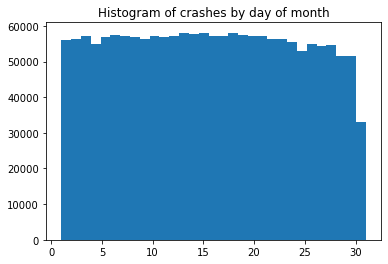

In [43]:
dayhist = plt.figure()
plt.hist(histdata['CRASH DAY OF MONTH'], bins = 31)
plt.title('Histogram of crashes by day of month')
dayhist.savefig('dayhist.png')

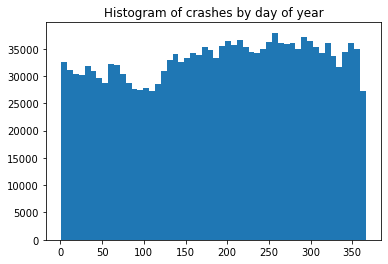

In [57]:
day2hist = plt.figure()
plt.hist(histdata['CRASH DAY OF YEAR'], bins = 52)
plt.title('Histogram of crashes by day of year')
day2hist.savefig('day2hist.png')

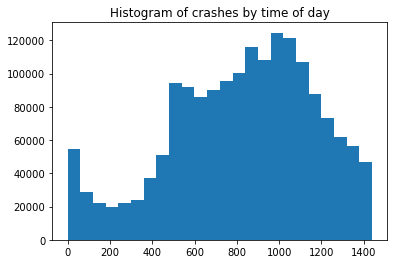

In [75]:
timehist = plt.figure()
plt.hist(histdata['CRASH MINUTE OF DAY'], bins = 24)
plt.title('Histogram of crashes by time of day')
timehist.savefig('timehist.png')

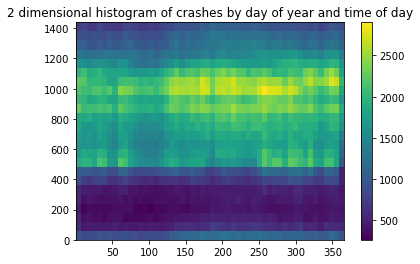

In [76]:
hist_2d = plt.figure()
plt.hist2d(histdata['CRASH DAY OF YEAR'], histdata['CRASH MINUTE OF DAY'], bins = (52, 24))
plt.title('2 dimensional histogram of crashes by day of year and time of day')
plt.colorbar()
hist_2d.savefig('2dhist.png')

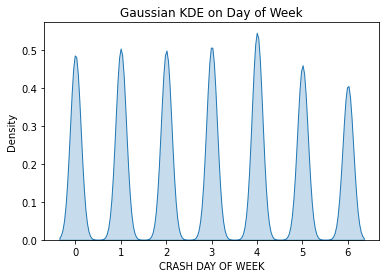

In [77]:
import seaborn as sb
kde_week = plt.figure()
sb.kdeplot(histdata['CRASH DAY OF WEEK'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Week')
kde_week.savefig('gausskdeweek.png')

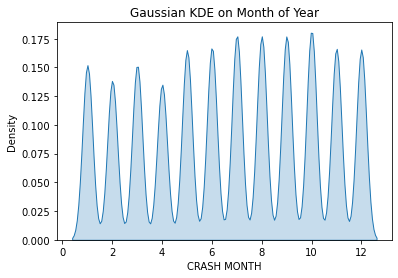

In [78]:
import seaborn as sb
kde_month = plt.figure()
sb.kdeplot(histdata['CRASH MONTH'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Month of Year')
kde_month.savefig('gausskdemonth.png')

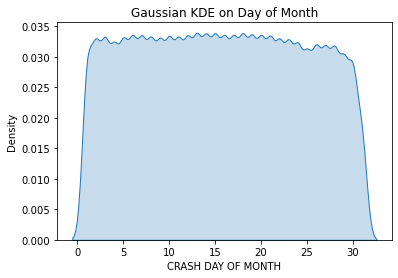

In [79]:
import seaborn as sb
kde_monthday = plt.figure()
sb.kdeplot(histdata['CRASH DAY OF MONTH'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Month')
kde_monthday.savefig('gausskdemonthday.png')

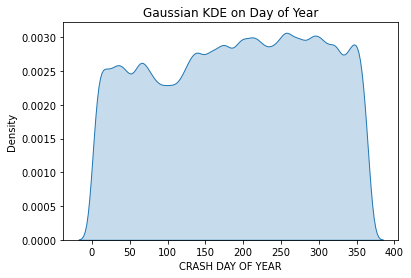

In [80]:
kde_year = plt.figure()
sb.kdeplot(histdata['CRASH DAY OF YEAR'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Year')
kde_year.savefig('gausskdeyear.png')

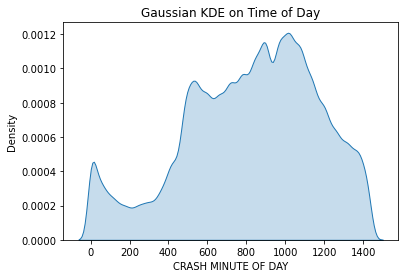

In [81]:
kde_time = plt.figure()
sb.kdeplot(histdata['CRASH MINUTE OF DAY'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Time of Day')
kde_time.savefig('gausskdetime.png')

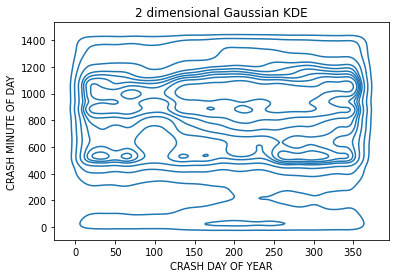

In [82]:
kde_2d = plt.figure()
sb.kdeplot(data = histdata, x = histdata['CRASH DAY OF YEAR'], y = histdata['CRASH MINUTE OF DAY'], bw_method = 'silverman')
plt.title('2 dimensional Gaussian KDE')
kde_2d.savefig('gausskde2d.png')

In [85]:
deathdata = histdata[data['NUMBER OF PERSONS KILLED'] > 0]

In [86]:
deathdata

,CRASH DATE,CRASH TIME,CRASH MONTH,CRASH DAY OF MONTH,CRASH DAY OF WEEK,CRASH DAY OF YEAR,CRASH MINUTE OF DAY
39,2021-07-09,00:43:00,7,9,4,190,43
148,2021-12-12,09:09:00,12,12,6,346,549
591,2021-04-15,15:18:00,4,15,3,105,918
1320,2021-04-17,13:31:00,4,17,5,107,811
1350,2021-07-08,22:03:00,7,8,3,189,1323
...,...,...,...,...,...,...,...
1941710,2022-10-27,14:23:00,10,27,3,300,863
1941892,2022-11-01,10:21:00,11,1,1,305,621
1942519,2022-11-04,00:00:00,11,4,4,308,0
1942695,2022-11-02,22:24:00,11,2,2,306,1344


In [94]:
injurydata = histdata[(data['NUMBER OF PERSONS KILLED'] == 0) & (data['NUMBER OF PERSONS INJURED'] > 0)]

In [134]:
injurydata

,CRASH DATE,CRASH TIME,CRASH MONTH,CRASH DAY OF MONTH,CRASH DAY OF WEEK,CRASH DAY OF YEAR,CRASH MINUTE OF DAY
7,2021-12-14,08:17:00,12,14,1,348,497
14,2021-12-14,23:10:00,12,14,1,348,1390
16,2021-12-14,20:03:00,12,14,1,348,1203
18,2021-12-11,19:43:00,12,11,5,345,1183
21,2021-12-14,05:46:00,12,14,1,348,346
...,...,...,...,...,...,...,...
1943135,2022-10-30,14:25:00,10,30,6,303,865
1943136,2022-11-01,17:00:00,11,1,1,305,1020
1943142,2022-11-05,15:00:00,11,5,5,309,900
1943144,2022-11-03,19:11:00,11,3,3,307,1151


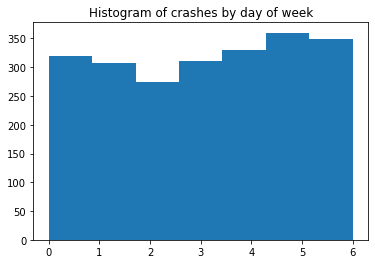

In [96]:
import matplotlib.pyplot as plt
weekhistd = plt.figure()
plt.hist(deathdata['CRASH DAY OF WEEK'], bins = 7)
plt.title('Histogram of crashes by day of week')
weekhistd.savefig('weekhistd.png')

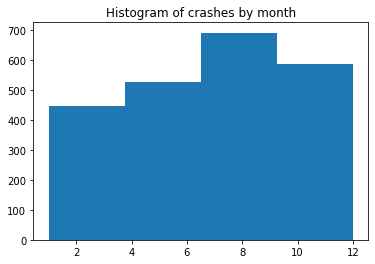

In [97]:
monthhistd = plt.figure()
plt.hist(deathdata['CRASH MONTH'], bins = 4)
plt.title('Histogram of crashes by month')
monthhistd.savefig('monthhistd.png')

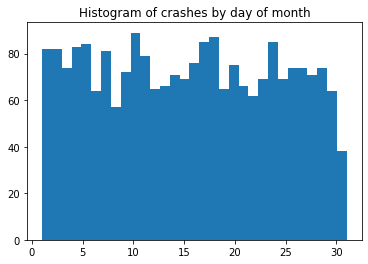

In [98]:
dayhistd = plt.figure()
plt.hist(deathdata['CRASH DAY OF MONTH'], bins = 31)
plt.title('Histogram of crashes by day of month')
dayhistd.savefig('dayhistd.png')

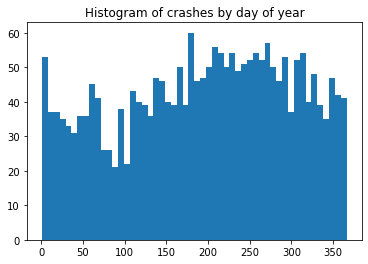

In [99]:
day2histd = plt.figure()
plt.hist(deathdata['CRASH DAY OF YEAR'], bins = 52)
plt.title('Histogram of crashes by day of year')
day2histd.savefig('day2histd.png')

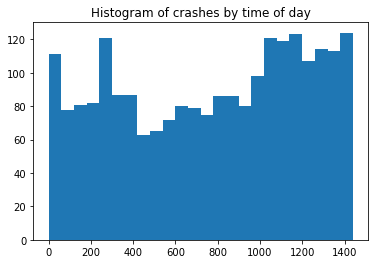

In [100]:
timehistd = plt.figure()
plt.hist(deathdata['CRASH MINUTE OF DAY'], bins = 24)
plt.title('Histogram of crashes by time of day')
timehistd.savefig('timehistd.png')

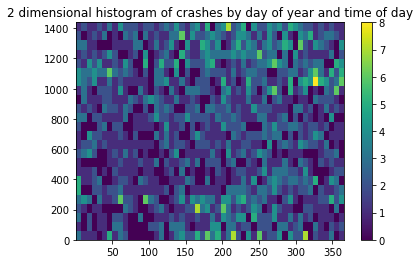

In [101]:
hist_2dd = plt.figure()
plt.hist2d(deathdata['CRASH DAY OF YEAR'], deathdata['CRASH MINUTE OF DAY'], bins = (52, 24))
plt.title('2 dimensional histogram of crashes by day of year and time of day')
plt.colorbar()
hist_2dd.savefig('2dhistd.png')

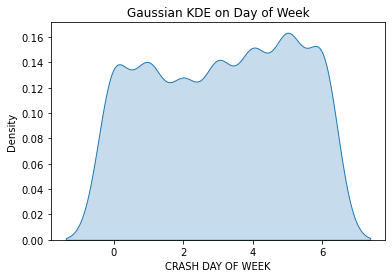

In [102]:
import seaborn as sb
kde_weekd = plt.figure()
sb.kdeplot(deathdata['CRASH DAY OF WEEK'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Week')
kde_weekd.savefig('gausskdeweekd.png')

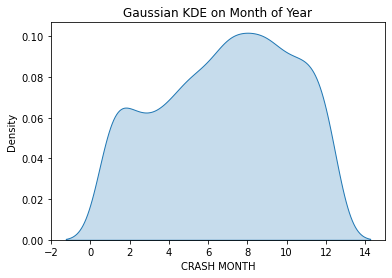

In [103]:
import seaborn as sb
kde_monthd = plt.figure()
sb.kdeplot(deathdata['CRASH MONTH'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Month of Year')
kde_monthd.savefig('gausskdemonthd.png')

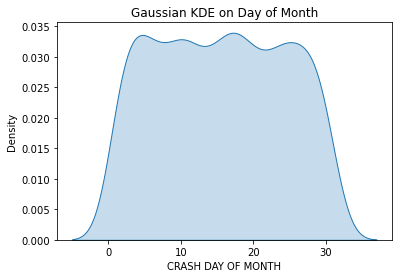

In [104]:
import seaborn as sb
kde_monthdayd = plt.figure()
sb.kdeplot(deathdata['CRASH DAY OF MONTH'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Month')
kde_monthdayd.savefig('gausskdemonthdayd.png')

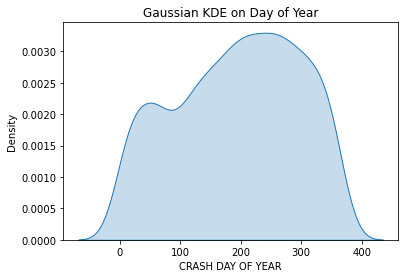

In [105]:
kde_yeard = plt.figure()
sb.kdeplot(deathdata['CRASH DAY OF YEAR'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Year')
kde_yeard.savefig('gausskdeyeard.png')

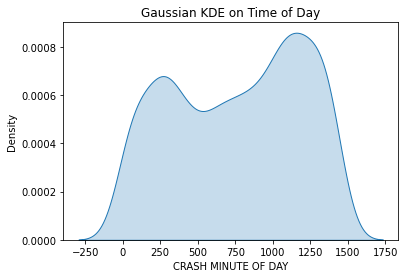

In [106]:
kde_timed = plt.figure()
sb.kdeplot(deathdata['CRASH MINUTE OF DAY'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Time of Day')
kde_timed.savefig('gausskdetimed.png')

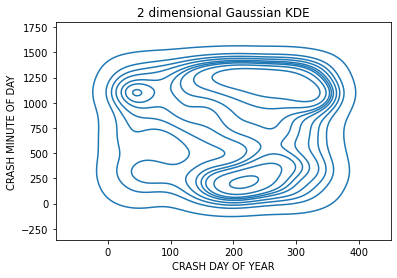

In [107]:
kde_2dd = plt.figure()
sb.kdeplot(data = deathdata, x = deathdata['CRASH DAY OF YEAR'], y = deathdata['CRASH MINUTE OF DAY'], bw_method = 'silverman')
plt.title('2 dimensional Gaussian KDE')
kde_2dd.savefig('gausskde2dd.png')

In [120]:
harmdata = histdata[(data['NUMBER OF PERSONS KILLED'] > 0) | (data['NUMBER OF PERSONS INJURED'] > 0)]

In [121]:
harmdata

,CRASH DATE,CRASH TIME,CRASH MONTH,CRASH DAY OF MONTH,CRASH DAY OF WEEK,CRASH DAY OF YEAR,CRASH MINUTE OF DAY
7,2021-12-14,08:17:00,12,14,1,348,497
14,2021-12-14,23:10:00,12,14,1,348,1390
16,2021-12-14,20:03:00,12,14,1,348,1203
18,2021-12-11,19:43:00,12,11,5,345,1183
21,2021-12-14,05:46:00,12,14,1,348,346
...,...,...,...,...,...,...,...
1943135,2022-10-30,14:25:00,10,30,6,303,865
1943136,2022-11-01,17:00:00,11,1,1,305,1020
1943142,2022-11-05,15:00:00,11,5,5,309,900
1943144,2022-11-03,19:11:00,11,3,3,307,1151


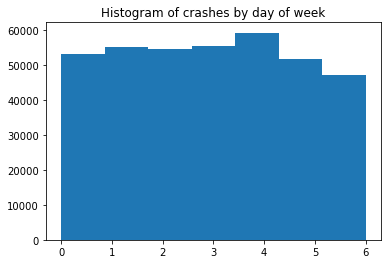

In [122]:
import matplotlib.pyplot as plt
weekhisth = plt.figure()
plt.hist(harmdata['CRASH DAY OF WEEK'], bins = 7)
plt.title('Histogram of crashes by day of week')
weekhisth.savefig('weekhisth.png')

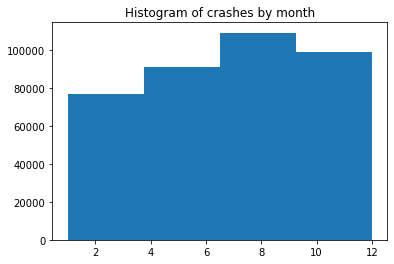

In [123]:
monthhisth = plt.figure()
plt.hist(harmdata['CRASH MONTH'], bins = 4)
plt.title('Histogram of crashes by month')
monthhisth.savefig('monthhisth.png')

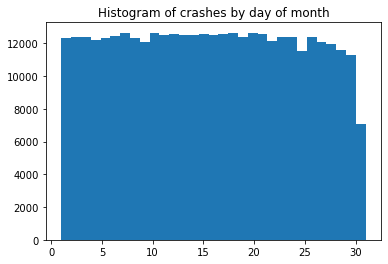

In [124]:
dayhisth = plt.figure()
plt.hist(harmdata['CRASH DAY OF MONTH'], bins = 31)
plt.title('Histogram of crashes by day of month')
dayhisth.savefig('dayhisth.png')

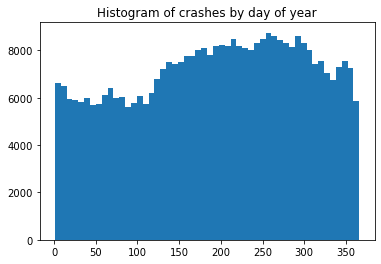

In [125]:
day2histh = plt.figure()
plt.hist(harmdata['CRASH DAY OF YEAR'], bins = 52)
plt.title('Histogram of crashes by day of year')
day2histh.savefig('day2histh.png')

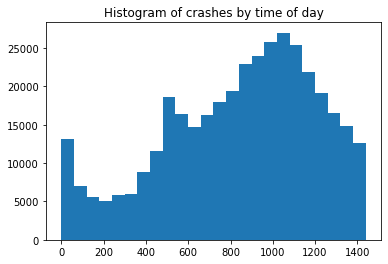

In [126]:
timehisth = plt.figure()
plt.hist(harmdata['CRASH MINUTE OF DAY'], bins = 24)
plt.title('Histogram of crashes by time of day')
timehisth.savefig('timehisth.png')

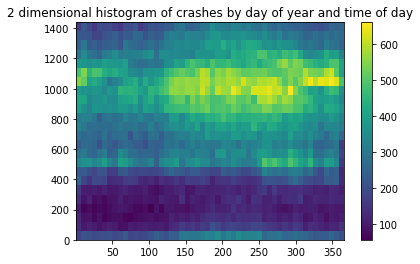

In [127]:
hist_2dh = plt.figure()
plt.hist2d(harmdata['CRASH DAY OF YEAR'], harmdata['CRASH MINUTE OF DAY'], bins = (52, 24))
plt.title('2 dimensional histogram of crashes by day of year and time of day')
plt.colorbar()
hist_2dh.savefig('2dhisth.png')

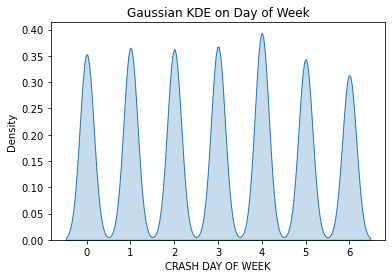

In [128]:
import seaborn as sb
kde_weekh = plt.figure()
sb.kdeplot(harmdata['CRASH DAY OF WEEK'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Week')
kde_weekh.savefig('gausskdeweekh.png')

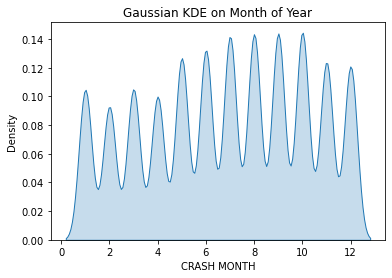

In [129]:
import seaborn as sb
kde_monthh = plt.figure()
sb.kdeplot(harmdata['CRASH MONTH'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Month of Year')
kde_monthh.savefig('gausskdemonthh.png')

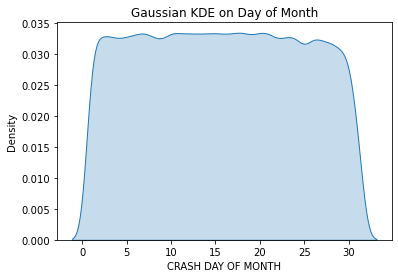

In [130]:
import seaborn as sb
kde_monthdayh = plt.figure()
sb.kdeplot(harmdata['CRASH DAY OF MONTH'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Month')
kde_monthdayh.savefig('gausskdemonthdayh.png')

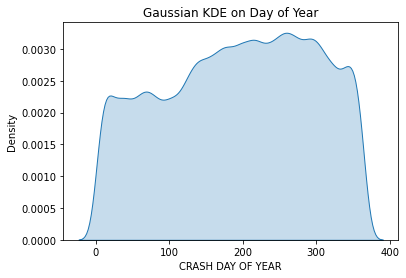

In [131]:
kde_yearh = plt.figure()
sb.kdeplot(harmdata['CRASH DAY OF YEAR'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Day of Year')
kde_yearh.savefig('gausskdeyearh.png')

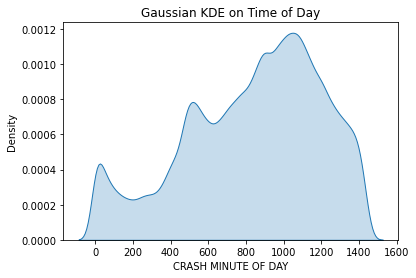

In [132]:
kde_timeh = plt.figure()
sb.kdeplot(harmdata['CRASH MINUTE OF DAY'], bw_method = 'silverman', fill=True)
plt.title('Gaussian KDE on Time of Day')
kde_timeh.savefig('gausskdetimeh.png')

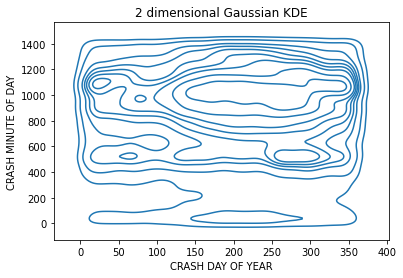

In [133]:
kde_2dh = plt.figure()
sb.kdeplot(data = harmdata, x = harmdata['CRASH DAY OF YEAR'], y = harmdata['CRASH MINUTE OF DAY'], bw_method = 'silverman')
plt.title('2 dimensional Gaussian KDE')
kde_2dh.savefig('gausskde2dh.png')